In [1]:
import pandas as pd

## Load

In [2]:
features = pd.read_csv("../data/features/user_behaviour.csv")
features.head()

,profile_id,age,income,gender_F,gender_M,gender_O,become_member_on_year_2013,become_member_on_year_2014,become_member_on_year_2015,become_member_on_year_2016,...,offer_7,offer_8,offer_9,offer_type_bogo,offer_type_discount,offer_type_informational,channels_email,channels_mobile,channels_social,channels_web
0,0009655768c64bdeb2e877511632db8f,33,72000.0,False,True,False,False,False,False,False,...,6,3,0,8,11,12,9,9,6,7
1,0011e0d4e6b944f998e987f904e8c1e5,40,57000.0,False,False,True,False,False,False,False,...,6,0,4,6,12,12,10,8,4,8
2,0020c2b971eb4e9188eac86d93036a77,59,90000.0,True,False,False,False,False,False,True,...,0,0,0,11,12,6,8,8,8,5
3,0020ccbbb6d84e358d3414a3ff76cffd,24,60000.0,True,False,False,False,False,False,True,...,0,0,0,14,8,6,8,8,6,6
4,003d66b6608740288d6cc97a6903f4f0,26,73000.0,True,False,False,False,False,False,False,...,6,0,2,0,18,12,9,8,6,7


## Demographic Analysis

/tmp/ipykernel_1448/567148810.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(years, rotation=45)


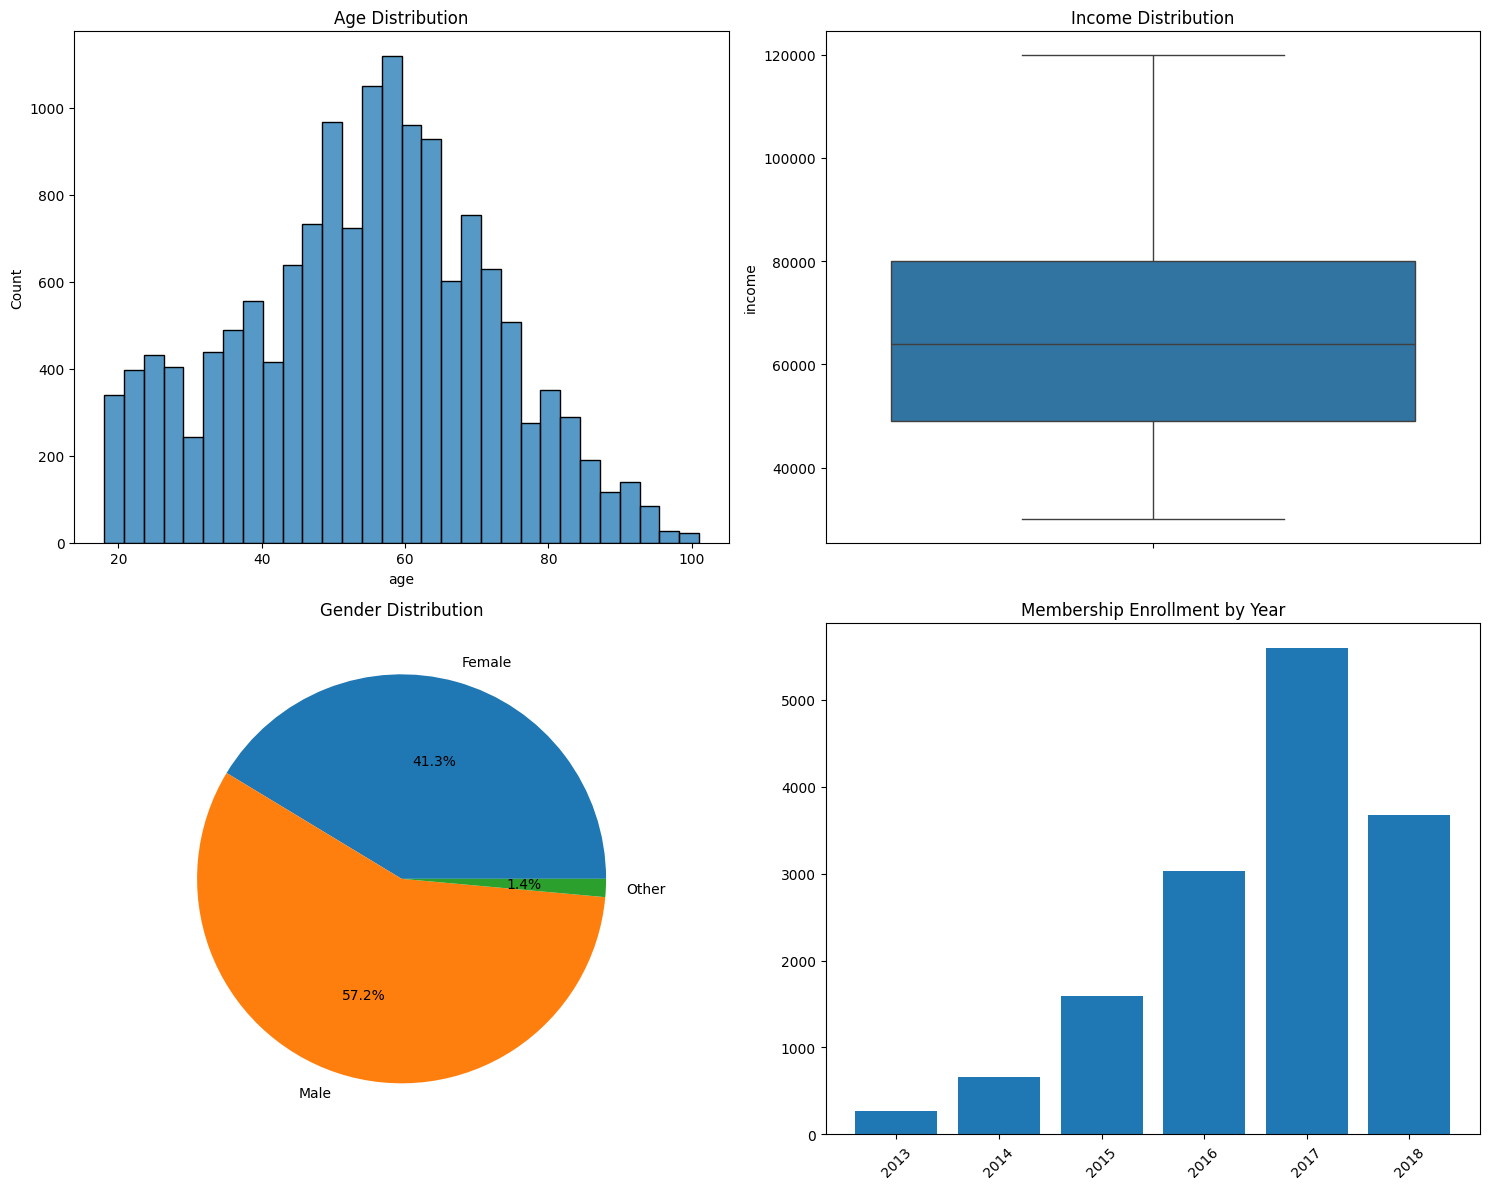

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style for all plots


# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution
sns.histplot(data=features, x='age', bins=30, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

# Income distribution 
sns.boxplot(data=features, y='income', ax=axes[0,1])
axes[0,1].set_title('Income Distribution')

# Gender distribution
gender_counts = [features['gender_F'].sum(), features['gender_M'].sum(), features['gender_O'].sum()]
axes[1,0].pie(gender_counts, labels=['Female', 'Male', 'Other'], autopct='%1.1f%%')
axes[1,0].set_title('Gender Distribution')

# Member enrollment by year
years = ['2013', '2014', '2015', '2016', '2017', '2018']
member_counts = [features[f'become_member_on_year_{year}'].sum() for year in years]
axes[1,1].bar(years, member_counts)
axes[1,1].set_title('Membership Enrollment by Year')
axes[1,1].set_xticklabels(years, rotation=45)

plt.tight_layout()
plt.show()

## Conversion Analysis

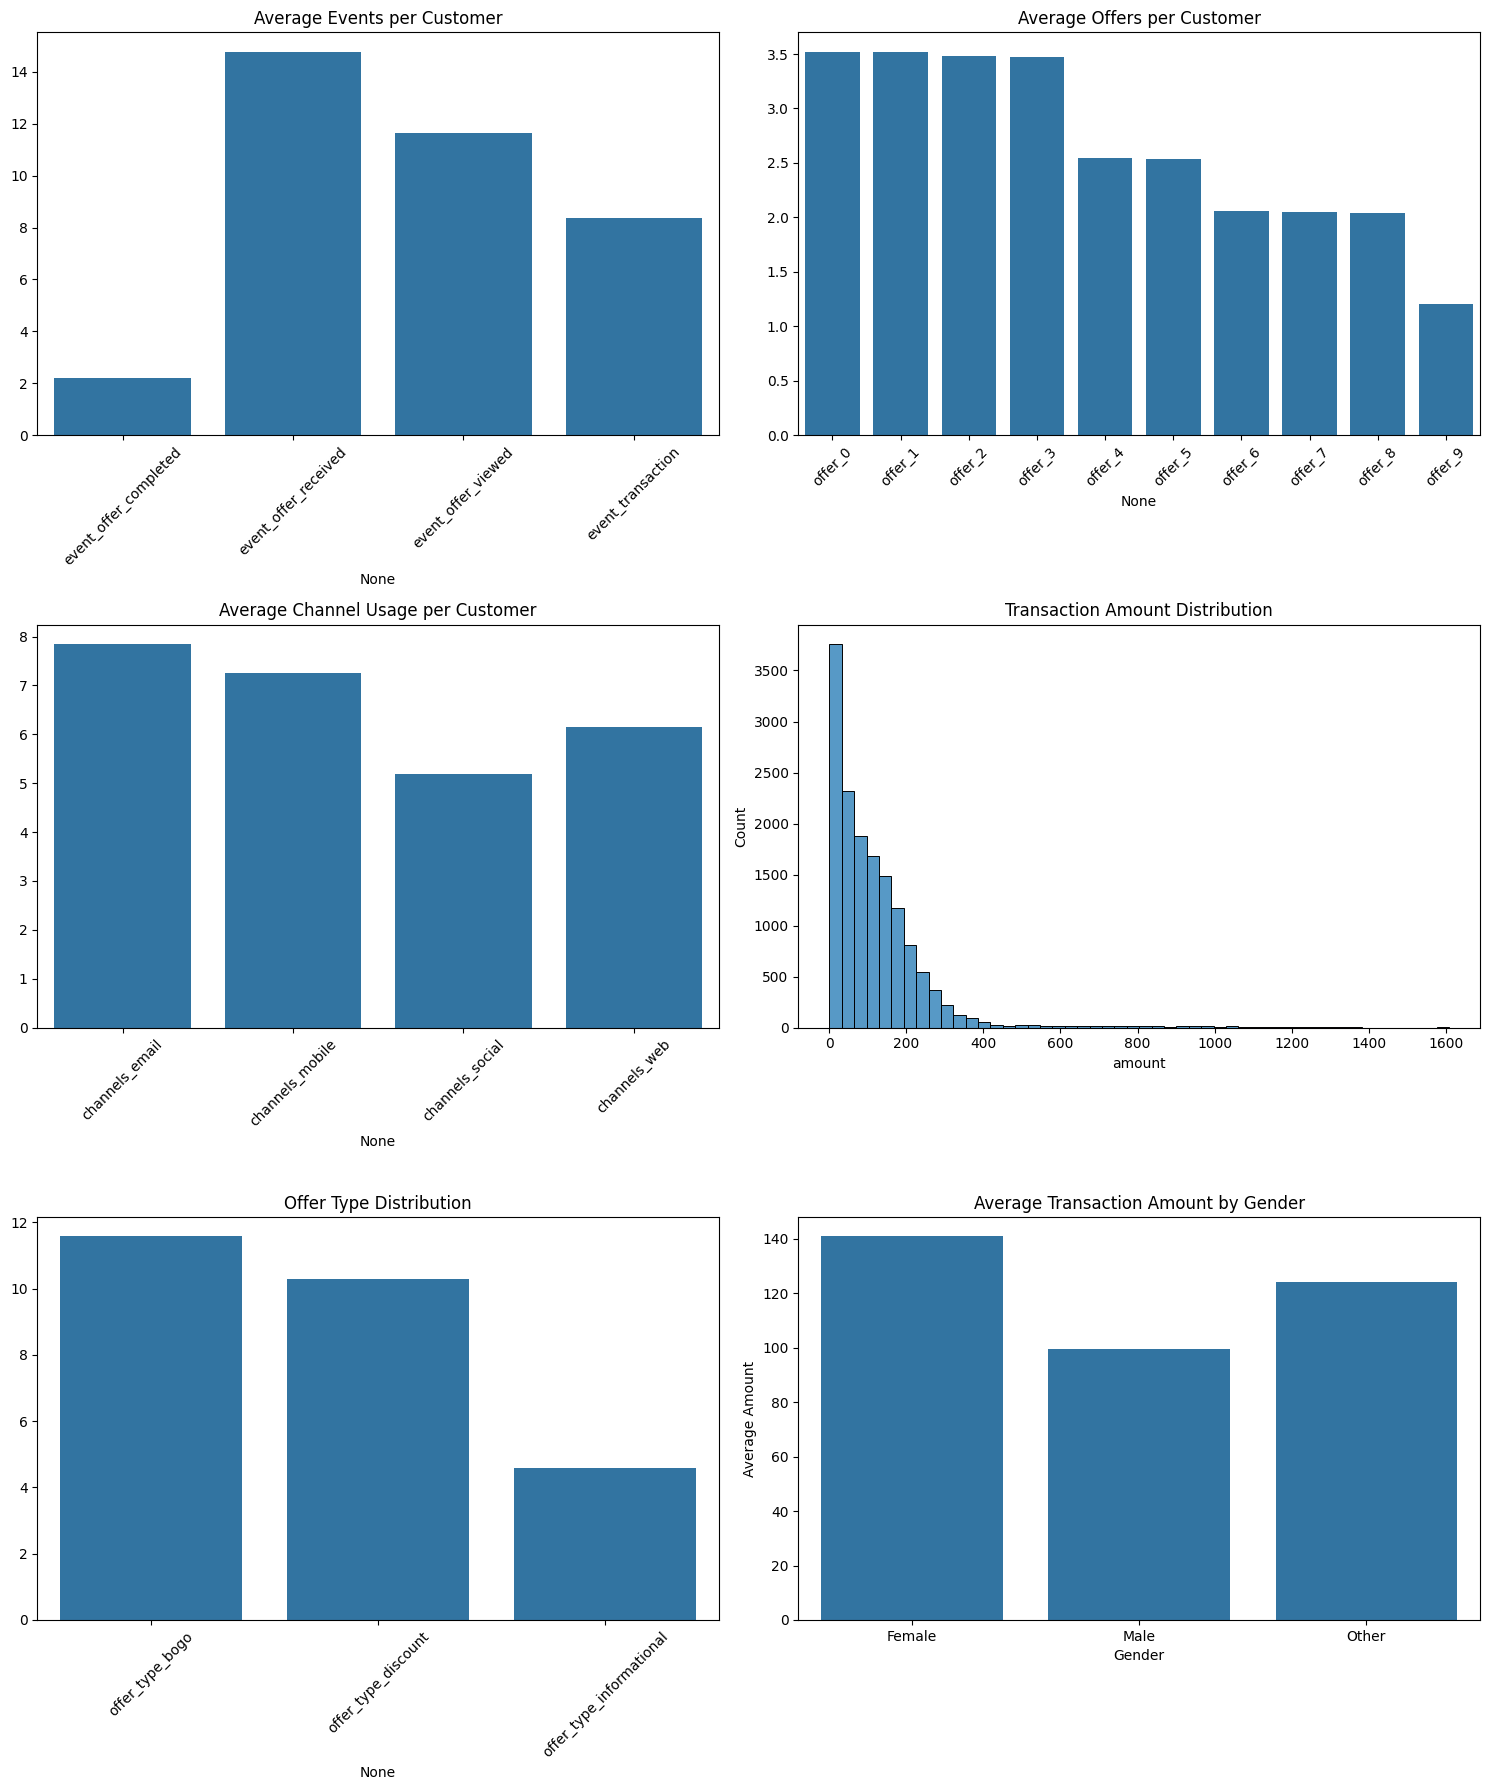

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'features' is your DataFrame

# Create a figure with three rows of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Event type distribution
event_cols = [col for col in features.columns if col.startswith('event_')]
event_means = features[event_cols].mean()
sns.barplot(x=event_means.index, y=event_means.values, ax=axes[0,0])
axes[0,0].set_title('Average Events per Customer')
axes[0,0].set_xticks(range(len(event_means.index)))
axes[0,0].set_xticklabels(event_means.index, rotation=45)

# Offer type distribution 
offer_cols = [col for col in features.columns if col.startswith('offer_') and 'type' not in col]
offer_means = features[offer_cols].mean()
sns.barplot(x=offer_means.index, y=offer_means.values, ax=axes[0,1])
axes[0,1].set_title('Average Offers per Customer')
axes[0,1].set_xticks(range(len(offer_means.index)))
axes[0,1].set_xticklabels(offer_means.index, rotation=45)

# Channel distribution
channel_cols = [col for col in features.columns if col.startswith('channels_')]
channel_means = features[channel_cols].mean()
sns.barplot(x=channel_means.index, y=channel_means.values, ax=axes[1,0])
axes[1,0].set_title('Average Channel Usage per Customer')
axes[1,0].set_xticks(range(len(channel_means.index)))
axes[1,0].set_xticklabels(channel_means.index, rotation=45)

# Transaction amount distribution
sns.histplot(data=features, x='amount', bins=50, ax=axes[1,1])
axes[1,1].set_title('Transaction Amount Distribution')

# Offer type breakdown
offer_type_cols = [col for col in features.columns if col.startswith('offer_type_')]
offer_type_means = features[offer_type_cols].mean()
sns.barplot(x=offer_type_means.index, y=offer_type_means.values, ax=axes[2,0])
axes[2,0].set_title('Offer Type Distribution')
axes[2,0].set_xticks(range(len(offer_type_means.index)))
axes[2,0].set_xticklabels(offer_type_means.index, rotation=45)

# Transaction amount by gender
gender_amount = pd.DataFrame({
    'Gender': ['Female', 'Male', 'Other'],
    'Average Amount': [
        features[features['gender_F']]['amount'].mean(),
        features[features['gender_M']]['amount'].mean(), 
        features[features['gender_O']]['amount'].mean()
    ]
})
sns.barplot(data=gender_amount, x='Gender', y='Average Amount', ax=axes[2,1])
axes[2,1].set_title('Average Transaction Amount by Gender')

plt.tight_layout()
plt.show()

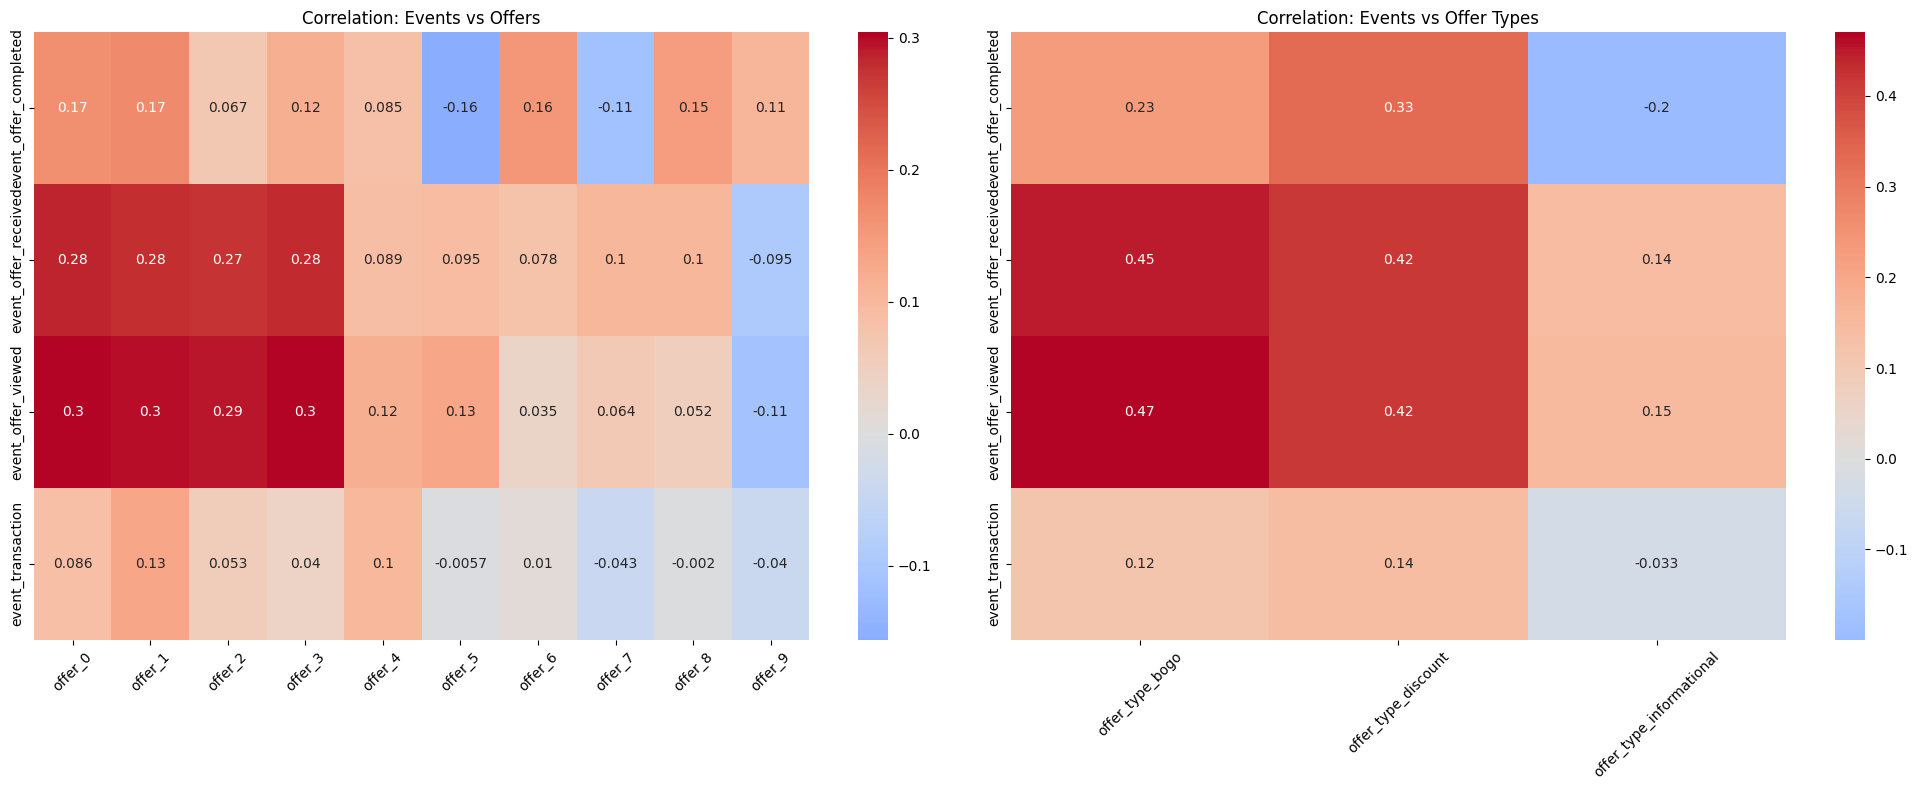

In [5]:
# Create correlation matrices
event_offer_corr = features[event_cols + offer_cols].corr()
event_type_corr = features[event_cols + offer_type_cols].corr()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot heatmap for events vs offers
sns.heatmap(event_offer_corr.loc[event_cols, offer_cols], 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            ax=ax1)
ax1.set_title('Correlation: Events vs Offers')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plot heatmap for events vs offer types
sns.heatmap(event_type_corr.loc[event_cols, offer_type_cols], 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            ax=ax2)
ax2.set_title('Correlation: Events vs Offer Types')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()